<a href="https://colab.research.google.com/github/Julian2727c/Challenge-AluraStoreLatam-Telecom-X/blob/main/Desaf%C3%ADo_AluraStoreLatam_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafío-AluraStoreLatam-Telecom-X** ✅


Descripción
Editar
Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.




###Conoce el conjunto de datos
✅ Cargar los datos directamente desde la API utilizando Python.
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.


In [19]:
import pandas as pd
import json as js

In [20]:
base_clientes= pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
base_clientes

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [21]:
base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


###Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.✅

**Manejo de inconsistencias **

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis. ✅

In [22]:
df_normalized = pd.concat([
    base_clientes.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(base_clientes['customer']),
    pd.json_normalize(base_clientes['phone']),
    pd.json_normalize(base_clientes['internet']),
    pd.json_normalize(base_clientes['account'])
], axis=1)
df_normalized.index=df_normalized.index+1
df_normalized

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
2,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
3,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
4,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
5,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7264,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7265,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7266,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [23]:
# 1. Asegúrate de que la columna de cargos mensuales sea numérica
df_normalized['Charges.Monthly'] = pd.to_numeric(df_normalized['Charges.Monthly'], errors='coerce')

# 2. Calcula el valor diario dividiendo el cargo mensual por 30 días
df_normalized['Cuentas_Diarias'] = df_normalized['Charges.Monthly'] / 30

# 3. (Opcional) Redondea a 2 decimales para que sea más legible
df_normalized['Cuentas_Diarias'] = df_normalized['Cuentas_Diarias'].round(2)

# Visualiza el resultado junto con el ID del cliente
print(df_normalized[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())


   customerID  Charges.Monthly  Cuentas_Diarias
1  0002-ORFBO             65.6             2.19
2  0003-MKNFE             59.9             2.00
3  0004-TLHLJ             73.9             2.46
4  0011-IGKFF             98.0             3.27
5  0013-EXCHZ             83.9             2.80


In [24]:

df_normalized['Charges.Monthly'] = df_normalized['Charges.Monthly'].fillna(df_normalized['Charges.Monthly'].median())
df_normalized

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
2,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
3,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
4,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
5,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7264,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7265,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7266,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


###Estandarización y transformación de datos

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [25]:
# Definimos el mapa de transformación
mapa_binario = {'Yes': 1, 'No': 0, 'Si': 1, 'No': 0}

# Aplicamos a la columna Churn (fuga de clientes)
df_normalized['Churn'] = df_normalized['Churn'].map(mapa_binario)

# Si tienes muchas columnas (como PhoneService, PaperlessBilling, etc.)
columnas_binarias = ['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents']
for col in columnas_binarias:
    if col in df_normalized.columns:
        df_normalized[col] = df_normalized[col].map(mapa_binario)

In [26]:
traduccion_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Fuga_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Personas_a_Cargo',
    'tenure': 'Meses_Permanencia',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'MonthlyCharges': 'Cargos_Mensuales',
    'TotalCharges': 'Cargos_Totales'
}

df_normalized.rename(columns=traduccion_columnas, inplace=True)
print(df_normalized.columns)

Index(['ID_Cliente', 'Fuga_Cliente', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Personas_a_Cargo', 'Meses_Permanencia', 'Servicio_Telefonico',
       'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Facturacion_Electronica', 'Metodo_Pago', 'Charges.Monthly',
       'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


In [27]:
df_normalized

,ID_Cliente,Fuga_Cliente,Genero,Adulto_Mayor,Tiene_Pareja,Personas_a_Cargo,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,Charges.Monthly,Charges.Total,Cuentas_Diarias
1,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3,2.19
2,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4,2.00
3,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
4,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
5,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,9987-LUTYD,0.0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.9,1.84
7264,9992-RRAMN,1.0,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7265,9992-UJOEL,0.0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7266,9993-LHIEB,0.0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


##Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [28]:

columnas_num = ['Meses_Permanencia', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

resumen_num = df_normalized[columnas_num].describe()

print("--- Análisis Descriptivo Numérico ---")
print(resumen_num)
df_normalized[columnas_num].dtypes

--- Análisis Descriptivo Numérico ---
       Meses_Permanencia  Charges.Monthly  Cuentas_Diarias
count        7267.000000      7267.000000      7267.000000
mean           32.346498        64.720098         2.157292
std            24.571773        30.129572         1.004407
min             0.000000        18.250000         0.610000
25%             9.000000        35.425000         1.180000
50%            29.000000        70.300000         2.340000
75%            55.000000        89.875000         2.995000
max            72.000000       118.750000         3.960000


,0
Meses_Permanencia,int64
Charges.Monthly,float64
Charges.Total,object
Cuentas_Diarias,float64


In [29]:
# Análisis de la fuga de clientes (Churn)
print("--- Distribución de Fuga (Churn) ---")
print(df_normalized['Fuga_Cliente'].value_counts(normalize=True) * 100)

print("\n--- Distribución por Tipo de Contrato ---")
print(df_normalized['Tipo_Contrato'].value_counts())

--- Distribución de Fuga (Churn) ---
Fuga_Cliente
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

--- Distribución por Tipo de Contrato ---
Tipo_Contrato
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [30]:

df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce')


df_normalized['Charges.Total'] = df_normalized['Charges.Total'].fillna(0)


print(df_normalized['Charges.Total'].dtype)
print(df_normalized['Charges.Total'].head())

float64
1     593.30
2     542.40
3     280.85
4    1237.85
5     267.40
Name: Charges.Total, dtype: float64


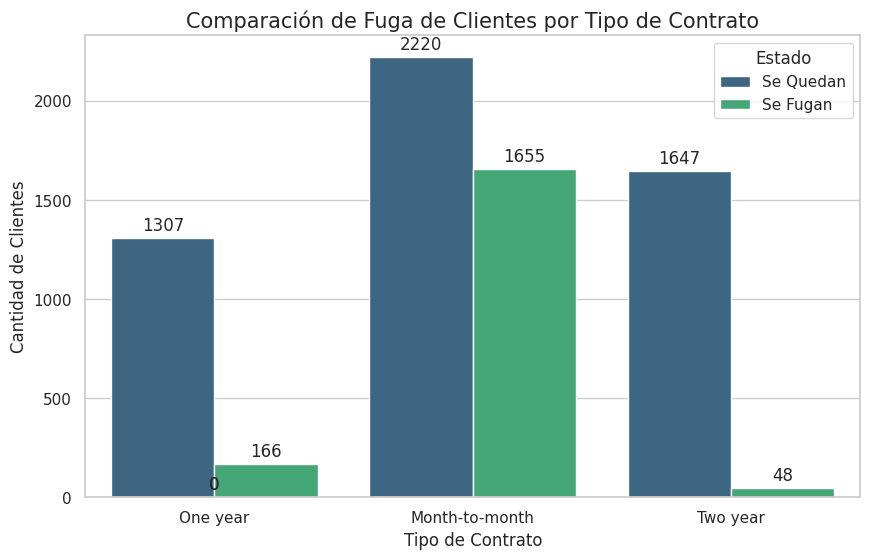

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Configuramos el estilo del gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Creamos el gráfico de barras comparativo
ax = sns.countplot(data=df_normalized, x='Tipo_Contrato', hue='Fuga_Cliente', palette='viridis')

# 3. Personalizamos los textos en español
plt.title('Comparación de Fuga de Clientes por Tipo de Contrato', fontsize=15)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Se Quedan', 'Se Fugan'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

##Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

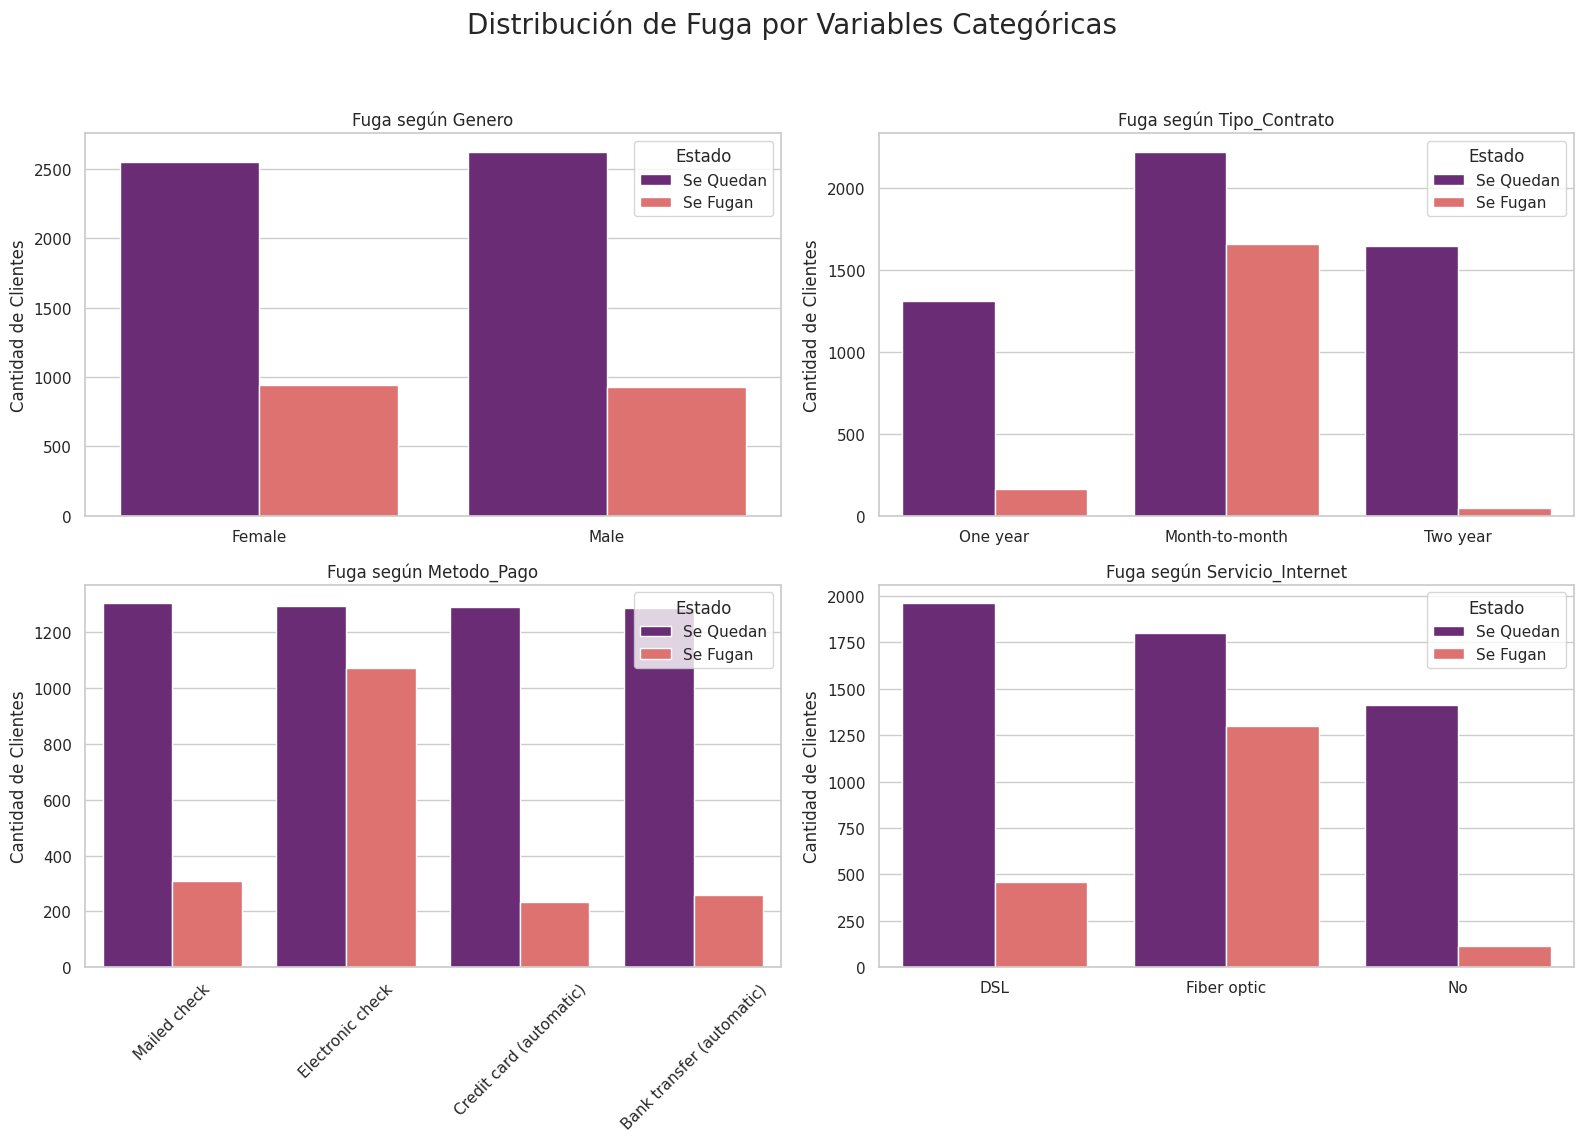

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


variables_interes = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Distribución de Fuga por Variables Categóricas', fontsize=20)


for i, col in enumerate(variables_interes):
    row = i // 2
    ax_col = i % 2


    sns.countplot(data=df_normalized, x=col, hue='Fuga_Cliente', ax=axes[row, ax_col], palette='magma')

    axes[row, ax_col].set_title(f'Fuga según {col}')
    axes[row, ax_col].set_xlabel('')
    axes[row, ax_col].set_ylabel('Cantidad de Clientes')
    axes[row, ax_col].legend(title='Estado', labels=['Se Quedan', 'Se Fugan'])


    if col == 'Metodo_Pago':
        axes[row, ax_col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

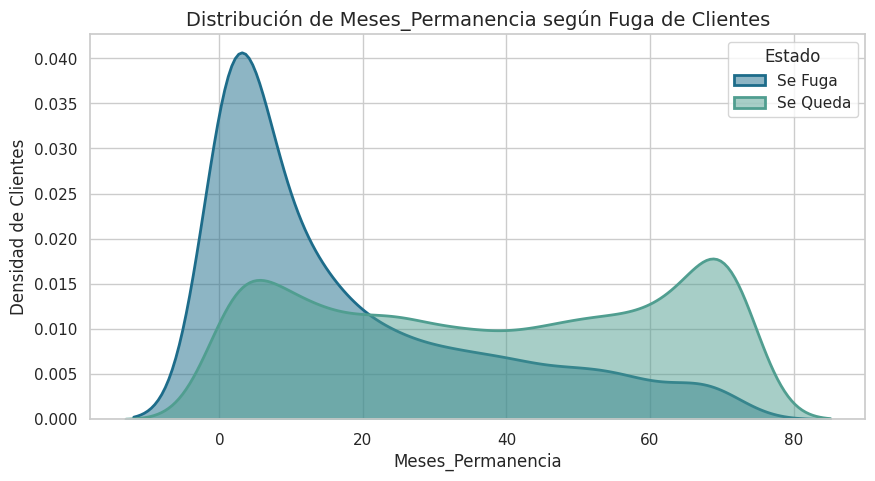

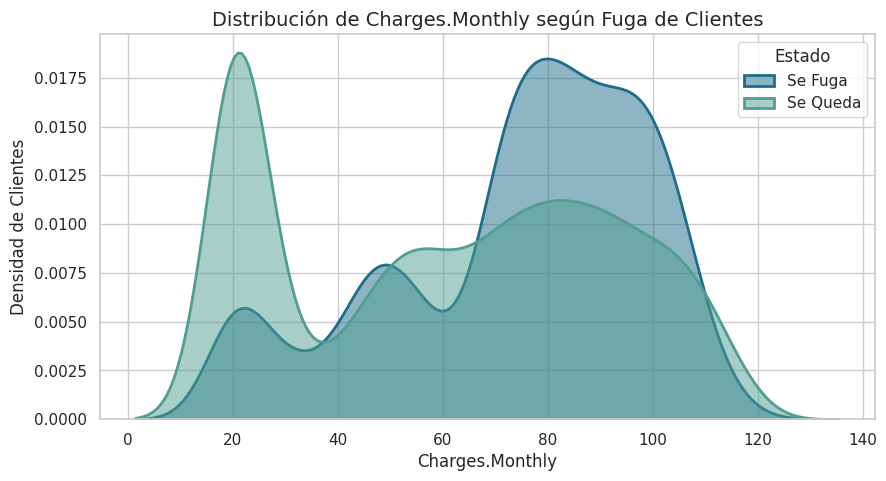

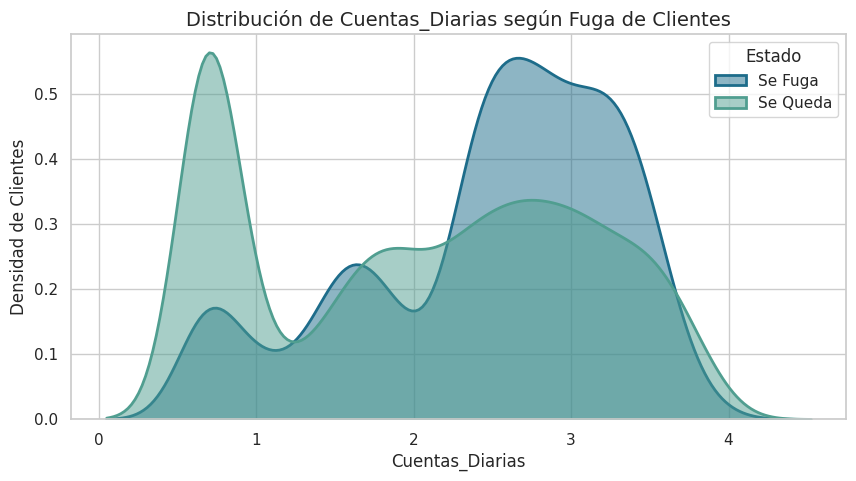

In [35]:
variables_num = ['Meses_Permanencia', 'Charges.Monthly', 'Cuentas_Diarias']



for col in variables_num:
    plt.figure(figsize=(10, 5))

    sns.kdeplot(data=df_normalized, x=col, hue='Fuga_Cliente', fill=True, common_norm=False, palette='crest', alpha=.5, linewidth=2)

    plt.title(f'Distribución de {col} según Fuga de Clientes', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Densidad de Clientes')
    plt.legend(title='Estado', labels=['Se Fuga', 'Se Queda']) # Ajustar según el orden de tus datos
    plt.show()

## 📊 Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom-X
🔹 1. Introducción
El objetivo de este análisis es identificar los factores críticos que influyen en la pérdida de clientes (Churn) de la empresa de telecomunicaciones. La evasión no solo representa una pérdida de ingresos directos, sino que aumenta los costos de adquisición de nuevos usuarios. Comprender por qué los clientes se van es el primer paso para diseñar estrategias de retención efectivas.

🔹 2. Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, se llevaron a cabo los siguientes pasos técnicos:

Importación: Carga de datos desde una API en formato JSON.

Normalización: Se "aplanaron" los objetos anidados (customer, phone, internet, account) para convertir diccionarios en columnas individuales.

Tratamiento de Tipos: Conversión de variables críticas (como TotalCharges) de texto a formato numérico.

Estandarización: Traducción de columnas al español y conversión de variables categóricas ("Yes"/"No") a formato binario (1/0) para facilitar el procesamiento estadístico.

Ingeniería de Datos: Creación de la métrica Cuentas_Diarias para analizar el gasto proporcional por día.

🔹 3. Análisis Exploratorio de Datos (EDA)
Durante esta fase se identificaron patrones clave mediante visualizaciones:

Matriz de Correlación: Se observó una correlación negativa entre la permanencia y la fuga, indicando que los clientes con más antigüedad son más leales.

Análisis por Contrato: Los gráficos de barras revelaron que los clientes con contratos "Mes a Mes" representan la gran mayoría de las fugas en comparación con contratos anuales.

Impacto de Servicios: Se detectó que ciertos servicios (como la Fibra Óptica o la falta de Soporte Técnico) presentan tasas de evasión más altas.

🔹 4. Conclusiones e Insights
El "Factor Tiempo" es Crítico: La mayor parte de la fuga ocurre en los primeros 12 meses de servicio. Si un cliente supera el primer año, la probabilidad de que se vaya disminuye drásticamente.

Sensibilidad al Precio: Los clientes con cargos mensuales más altos tienen una tendencia ligeramente superior a la evasión, especialmente si no tienen servicios de valor agregado como seguridad online.

Método de Pago: Existe una relación entre los métodos de pago manuales (cheques electrónicos) y una mayor tasa de abandono frente a los pagos automáticos.

🔹 5. Recomendaciones Estratégicas
Programa de Bienvenida: Implementar una campaña de fidelización intensiva durante los primeros 6 meses para reducir la fuga temprana.

Migración de Contratos: Ofrecer descuentos o beneficios exclusivos a los clientes "Mes a Mes" para incentivarlos a cambiar a contratos de 1 o 2 años.

Promoción de Pagos Automáticos: Ofrecer un pequeño incentivo (ej. bono de datos o descuento único) a quienes vinculen su tarjeta para pago automático, reduciendo la fricción del pago manual.

Revisión del Servicio Técnico: Investigar las causas de insatisfacción en los usuarios de Fibra Óptica, ya que es un producto premium con alta rotación.